<a href="https://colab.research.google.com/github/plance17/Aprendizaje-de-Maquina/blob/master/Teor%C3%ADa_4_Ejercicio_2_Bien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyradiomics

     |████████████████████████████████| 163kB 5.8MB/s 
     |████████████████████████████████| 40kB 5.4MB/s 
     |████████████████████████████████| 44.9MB 92kB/s 


In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy
import math
import pandas as pd 
from scipy import linalg, optimize
#from sympy.solvers import solve
#from sympy import Symbol

from sklearn import neighbors
from sklearn import metrics
from skimage.feature import hog
from sklearn import svm
import sklearn
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split


#import array as arr

import urllib.request 

import zipfile
import cv2 as cv

from skimage.transform import resize

from radiomics import featureextractor
import os
import SimpleITK as sitk

In [3]:
# Descarga y descomprimir
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip

--2020-11-13 12:30:17--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.36.35
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.36.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198985388 (190M) [application/octet-stream]
Saving to: ‘dataroot/fvk7h5dg2p-1.zip’

fvk7h5dg2p-1.zip    100%[===================>] 189.77M  29.6MB/s    in 7.0s    

2020-11-13 12:30:25 (27.0 MB/s) - ‘dataroot/fvk7h5dg2p-1.zip’ saved [198985388/198985388]



In [4]:
with zipfile.ZipFile(dataroot+"fvk7h5dg2p-1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
    names = [info.filename for info in zip_ref.infolist()]# if info.is_dir()]

zip_ref.printdir()

File Name                                             Modified             Size
Pneumonia/                                     2020-06-10 15:14:42            0
Pneumonia/person71_virus_132.jpeg              2020-06-10 15:14:42       117286
Pneumonia/person1678_virus_2895.jpeg           2020-06-10 15:14:42       118628
Pneumonia/person22_virus_55.jpeg               2020-06-10 15:14:42        63275
Pneumonia/person1628_virus_2821.jpeg           2020-06-10 15:14:42        54996
Pneumonia/person52_virus_106.jpeg              2020-06-10 15:14:42        56909
Pneumonia/person26_virus_60.jpeg               2020-06-10 15:14:42        66772
Pneumonia/person75_virus_136.jpeg              2020-06-10 15:14:42        55188
Pneumonia/person59_virus_116.jpeg              2020-06-10 15:14:42        53215
Pneumonia/person1670_virus_2886.jpeg           2020-06-10 15:14:42        55391
Pneumonia/person1613_virus_2799.jpeg           2020-06-10 15:14:42        58689
Pneumonia/person67_virus_126.jpeg       

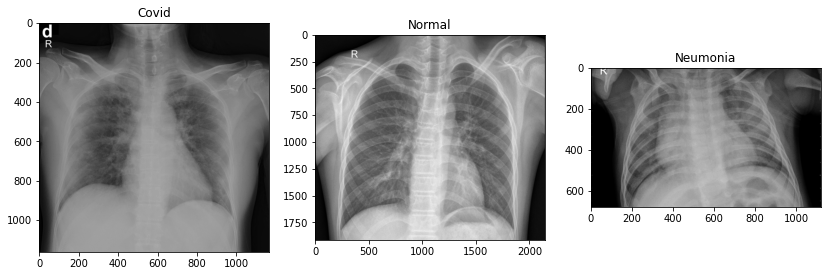

In [5]:
img_covid     = cv.imread(dataroot+'COVID-19 cases/1-s2.0-S0929664620300449-gr2_lrg-d.jpg',0)  #Second argument is a flag which specifies the way image should be read.
img_normal    = cv.imread(dataroot+'Normal /IM-0011-0001-0001.jpeg',0)
img_pneumonia = cv.imread(dataroot+'Pneumonia/person1650_virus_2854.jpeg',0)

plt.figure(figsize=(14,14))
plt.subplot(1,3,1).set_title('Covid')
plt.imshow(img_covid,cmap='gray')
plt.subplot(1,3,2).set_title('Normal')
plt.imshow(img_normal,cmap='gray')
plt.subplot(1,3,3).set_title('Neumonia')
plt.imshow(img_pneumonia,cmap='gray')
plt.show()

In [6]:
names_column=np.reshape(names,[len(names),1])
print(len(names_column[1,0]))         #Me da la longitud de la palabra
print(names_column.size)
#print(names_column)

count_empty_files=0
for i in np.arange(0,names_column.size):
  img=cv.imread(dataroot+names[i],0)
  if np.any(img)==None:
    count_empty_files=count_empty_files+1

print(count_empty_files)

#En esta matriz voy a guardar los datos de a que corresponde ese índice en los archivos names_column
index=np.zeros(names_column.size-count_empty_files)    #El -count_empty_files es porque hay 3 archivos(uno para cada tipo de pulmon), que está vacío
#Si index[i]=0 entonces names_column[i] es un archivo de una imagen de una radiografía a alguien normal
#Si index[i]=1 entonces names_column[i] es un archivo de una imagen de una radiografía a alguien con neumonia
#Si index[i]=2 entonces names_column[i] es un archivo de una imagen de una radiografía a alguien con covid

o=0 #Tengo que usar o como contador, porque i va de 0 a names_column.size(606), y la matriz index va hasta 603 
for i in np.arange(0,names_column.size):
  img=cv.imread(dataroot+names[i],0)
  if np.any(img)!=None:
    character=[None]*len(names_column[i,0])
    n=0
    #print(character)
    #print(len(names_column[i,0]))
    #j va a tomar como "valor" la letra de la palabra del nombre del archivo
    for j in names_column[i,0]:
      character[n]=j
      n=n+1 
    if character[0]=='N':
      index[o]=0 
    if character[0]=='P':
      index[o]=1
    if character[0]=='C':
      index[o]=2
    o=o+1
print(index)
print(index.size)


33
606
3
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [7]:
num_normal_photos=0
num_neumonia_photos=0
num_covid_photos=0


#Hay un archivo para radiografias normales, con neumonia y con covid que está vacío, lo tengo que sacar, por eso la condición   np.any(img)!=None
for i in np.arange(0,index.size):
  if index[i]==0:
    num_normal_photos=num_normal_photos+1
  if index[i]==1:
    num_neumonia_photos=num_neumonia_photos+1
  if index[i]==2:
    num_covid_photos=num_covid_photos+1

print('Número de Radiografías normales:',num_normal_photos)
print('Número de Radiografías con neumonia:',num_neumonia_photos)
print('Número de Radiografías con covid:',num_covid_photos) 

Número de Radiografías normales: 234
Número de Radiografías con neumonia: 148
Número de Radiografías con covid: 221


Pneumonia/
o= 603
[[ 3 16 17 ...  0  0  0]
 [ 3 15 17 ...  0  0  0]
 [ 2 15 17 ...  0  0  0]
 ...
 [ 0  8  4 ... 14 13 13]
 [ 0  8  4 ... 14 15 15]
 [ 0  8  4 ... 14 16 16]]


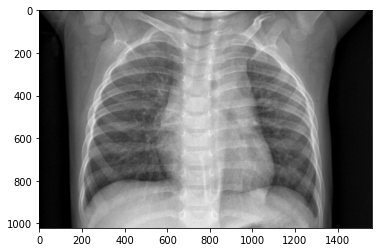

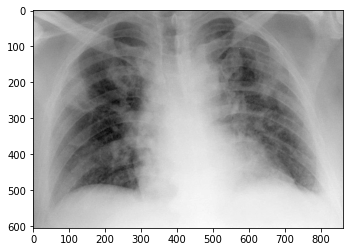

In [77]:
print(names[0])

count_normal=0
count_neumonia=0
count_covid=0
'''
x_normal=[None]*num_normal_photos
y_normal=[None]*num_normal_photos

x_neumonia=[None]*num_neumonia_photos
y_neumonia=[None]*num_neumonia_photos

x_covid=[None]*num_covid_photos
y_covid=[None]*num_covid_photos


o=0
#print(x_normal)
for i in np.arange(0,len(names)):
  img=cv.imread(dataroot+names[i],0)
  if np.any(img)!=None:
    if index[o]==0:
      x_normal[count_normal]=img
      y_normal[count_normal]=0
      count_normal=count_normal+1
    if index[o]==1:
      x_neumonia[count_neumonia]=img
      y_neumonia[count_neumonia]=1
      count_neumonia=count_neumonia+1
    if index[o]==2:
      x_covid[count_covid]=img
      y_covid[count_covid]=2
      count_covid=count_covid+1
    o=o+1
'''

x_normal=[]
y_normal=[]

x_neumonia=[]
y_neumonia=[]

x_covid=[]
y_covid=[]

o=0

for i in np.arange(0,len(names)):
  img=cv.imread(dataroot+names[i],0)
  if np.any(img)!=None:
    if index[o]==0:
      x_normal.append(img)
      y_normal.append(0)
      count_normal=count_normal+1
    if index[o]==1:
      x_neumonia.append(img)
      y_neumonia.append(1)
      count_neumonia=count_neumonia+1
    if index[o]==2:
      x_covid.append(img)
      y_covid.append(2)
      count_covid=count_covid+1
    o=o+1
print('o=',o)
print(x_normal[10])

plt.imshow(x_normal[10],cmap='gray')
plt.show()
plt.imshow(x_covid[50],cmap='gray')
plt.show()

In [12]:
#x=[None]*(num_normal_photos+num_neumonia_photos+num_covid_photos)
#y=[None]*(num_normal_photos+num_neumonia_photos+num_covid_photos)

x=[]
y=[]

l=0
m=0
n=0
'''
p=0

for i in np.arange(0,num_normal_photos+num_neumonia_photos+num_covid_photos):
  if index[i]==0 :
    x[p]=x_normal[l]
    y[p]=y_normal[l]
    l=l+1
  if index[i]==1:
    x[p]=x_neumonia[m]
    y[p]=y_neumonia[m]
    m=m+1
  if index[i]==2:
    x[p]=x_covid[n]
    y[p]=y_covid[n]
    n=n+1
  p=p+1
'''
for i in np.arange(0,num_normal_photos+num_neumonia_photos+num_covid_photos):
  if index[i]==0 :
    x.append(x_normal[l])
    y.append(y_normal[l])
    l=l+1
  if index[i]==1:
    x.append(x_neumonia[m])
    y.append(y_neumonia[m])
    m=m+1
  if index[i]==2:
    x.append(x_covid[n])
    y.append(y_covid[n])
    n=n+1

print(len(x))
print(type(x[0]))
print(type(x_normal[0]))

603
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [78]:
normal_features=[]
neumonia_features=[]
covid_features=[]

for i in np.arange(0,index.size):
  #img=cv.imread(os.path.join(dataroot+str(names[i]),img),0)
  img = cv.resize(x[i], (256,128), interpolation=cv.INTER_AREA)
  fd = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2)) 
  fd = fd/fd.max()
  if index[i]==0:
    normal_features.append(fd)
  if index[i]==1:
    neumonia_features.append(fd)      
  if index[i]==2:
    covid_features.append(fd)
  


In [79]:
DataCovid = pd.DataFrame(covid_features)
targetCovid=pd.DataFrame([2]*len(DataCovid))
DataNeumonia = pd.DataFrame(neumonia_features)
targetNeumonia=pd.DataFrame([1]*len(DataNeumonia))
DataNormal = pd.DataFrame(normal_features)
targetNormal =pd.DataFrame([0]*len(DataNormal))

Dataset = pd.concat([DataCovid, DataNeumonia, DataNormal],ignore_index= True,axis=0)
target = pd.concat([targetCovid, targetNeumonia, targetNormal],ignore_index= True,axis=0)

target.head

<bound method NDFrame.head of      0
0    2
1    2
2    2
3    2
4    2
..  ..
598  0
599  0
600  0
601  0
602  0

[603 rows x 1 columns]>

In [80]:
print(DataCovid.iloc[1])

d=np.asarray(DataCovid.iloc[1])
print(d.size)


0        0.328347
1        0.452387
2        0.452387
3        0.452387
4        0.452387
           ...   
16735    0.000000
16736    0.000000
16737    0.000000
16738    0.000000
16739    0.000000
Name: 1, Length: 16740, dtype: float64
16740


In [81]:
Dataset.head

<bound method NDFrame.head of         0         1         2      ...     16737     16738     16739
0    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.030102
1    0.328347  0.452387  0.452387  ...  0.000000  0.000000  0.000000
2    0.501564  0.256374  0.359704  ...  0.010665  0.206961  0.383447
3    0.298269  0.381555  0.381555  ...  0.000000  0.000000  0.000000
4    0.000000  0.000000  0.127030  ...  0.135040  0.112283  0.056586
..        ...       ...       ...  ...       ...       ...       ...
598  0.352461  0.351985  0.199353  ...  0.000000  0.000000  0.000000
599  0.184050  0.035145  0.078589  ...  0.126659  0.115077  0.148487
600  0.095325  0.302178  0.302178  ...  0.000000  0.000000  0.000000
601  0.023440  0.004032  0.009051  ...  0.179994  0.142298  0.391734
602  0.260380  0.000000  0.000000  ...  0.000000  0.000000  0.000000

[603 rows x 16740 columns]>

#**Método de k-vecinos mas cercanos**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.



Buenas Predicciones: 97
Malas Predicciones: 24


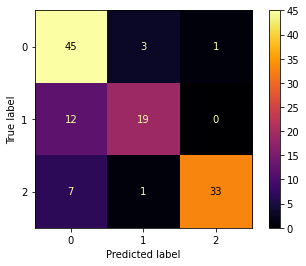

In [82]:
x_train, x_test, y_train, y_test = train_test_split(Dataset, target, test_size=0.2, random_state=0)

Kvecinos = neighbors.KNeighborsClassifier(n_neighbors=3)
Kvecinos.fit(x_train, y_train)

disp = metrics.plot_confusion_matrix(Kvecinos, x_test, y_test, cmap='inferno')

aciertos=disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[2,2]
errores=disp.confusion_matrix[0,1]+disp.confusion_matrix[0,2]+disp.confusion_matrix[1,0]+disp.confusion_matrix[1,2]+disp.confusion_matrix[2,0]+disp.confusion_matrix[2,1]

print()

print('Buenas Predicciones:',aciertos)
print('Malas Predicciones:',errores)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.



Buenas Predicciones: 83
Malas Predicciones: 38


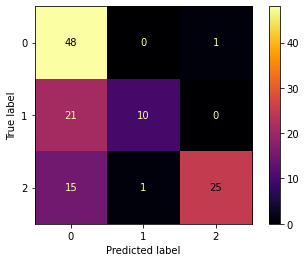

In [83]:
x_train, x_test, y_train, y_test = train_test_split(Dataset, target, test_size=0.2, random_state=0)

Kvecinos = neighbors.KNeighborsClassifier(n_neighbors=2)
Kvecinos.fit(x_train, y_train)

disp = metrics.plot_confusion_matrix(Kvecinos, x_test, y_test, cmap='inferno')

aciertos=disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[2,2]
errores=disp.confusion_matrix[0,1]+disp.confusion_matrix[0,2]+disp.confusion_matrix[1,0]+disp.confusion_matrix[1,2]+disp.confusion_matrix[2,0]+disp.confusion_matrix[2,1]

print()

print('Buenas Predicciones:',aciertos)
print('Malas Predicciones:',errores)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.



Buenas Predicciones: 94
Malas Predicciones: 27
Rate: 3.4814814814814814
Porcentaje de acierto: 77.68595041322314 %


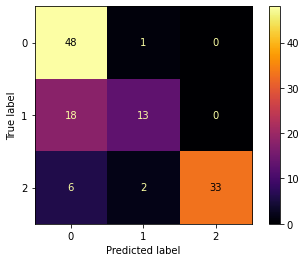

In [88]:
x_train, x_test, y_train, y_test = train_test_split(Dataset, target, test_size=0.2, random_state=0)

Kvecinos = neighbors.KNeighborsClassifier(n_neighbors=10)
Kvecinos.fit(x_train, y_train)

disp = metrics.plot_confusion_matrix(Kvecinos, x_test, y_test, cmap='inferno')

aciertos=disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[2,2]
errores=disp.confusion_matrix[0,1]+disp.confusion_matrix[0,2]+disp.confusion_matrix[1,0]+disp.confusion_matrix[1,2]+disp.confusion_matrix[2,0]+disp.confusion_matrix[2,1]

print()

print('Buenas Predicciones:',aciertos)
print('Malas Predicciones:',errores)
print('Rate:',aciertos/errores)
print('Porcentaje de acierto:',aciertos/(aciertos+errores)*100,'%')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.



Buenas Predicciones: 80
Malas Predicciones: 41
Rate: 1.951219512195122


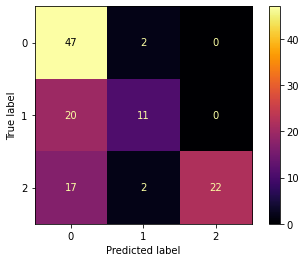

In [85]:
x_train, x_test, y_train, y_test = train_test_split(Dataset, target, test_size=0.2, random_state=0)

Kvecinos = neighbors.KNeighborsClassifier(n_neighbors=30)
Kvecinos.fit(x_train, y_train)

disp = metrics.plot_confusion_matrix(Kvecinos, x_test, y_test, cmap='inferno')

aciertos=disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[2,2]
errores=disp.confusion_matrix[0,1]+disp.confusion_matrix[0,2]+disp.confusion_matrix[1,0]+disp.confusion_matrix[1,2]+disp.confusion_matrix[2,0]+disp.confusion_matrix[2,1]

print()

print('Buenas Predicciones:',aciertos)
print('Malas Predicciones:',errores)
print('Rate:',aciertos/errores)

En el mejor de los casos se observa un 77% de precision en las predicciones.

# **Método Support Vector Machine**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Buenas Predicciones: 95
Malas Predicciones: 26
Rate: 3.6538461538461537
Porcentaje de acierto: 78.51239669421489 %


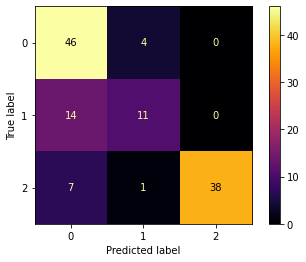

In [89]:
#x_train, x_test, y_train, y_test = train_test_split(Dataset['Radiografias'], Dataset['target'], shuffle = True, test_size=0.2, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(Dataset, target, test_size=0.2, shuffle = True, random_state=1)

classifier = svm.SVC(gamma = 0.001)
classifier.fit(x_train, y_train)

disp = metrics.plot_confusion_matrix(Kvecinos, x_test, y_test, cmap='inferno')

aciertos=disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[2,2]
errores=disp.confusion_matrix[0,1]+disp.confusion_matrix[0,2]+disp.confusion_matrix[1,0]+disp.confusion_matrix[1,2]+disp.confusion_matrix[2,0]+disp.confusion_matrix[2,1]

print()

print('Buenas Predicciones:',aciertos)
print('Malas Predicciones:',errores)
print('Rate:',aciertos/errores)
print('Porcentaje de acierto:',aciertos/(aciertos+errores)*100,'%')

El método de Support Vector Machine parece ser similar al mejor de los casos de k vecinos.

#**Decision Tree**

[[37  6  7]
 [ 3 20  2]
 [12  3 31]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73        50
           1       0.69      0.80      0.74        25
           2       0.78      0.67      0.72        46

    accuracy                           0.73       121
   macro avg       0.73      0.74      0.73       121
weighted avg       0.73      0.73      0.73       121


Buenas Predicciones: 88
Malas Predicciones: 33
Rate: 2.6666666666666665
Porcentaje de acierto: 72.72727272727273 %


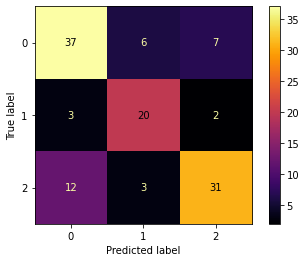

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(Dataset, target, test_size=0.2, shuffle = True, random_state=1)


classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

disp = metrics.plot_confusion_matrix(classifier, x_test, y_test, cmap='inferno')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


aciertos=disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[2,2]
errores=disp.confusion_matrix[0,1]+disp.confusion_matrix[0,2]+disp.confusion_matrix[1,0]+disp.confusion_matrix[1,2]+disp.confusion_matrix[2,0]+disp.confusion_matrix[2,1]

print()

print('Buenas Predicciones:',aciertos)
print('Malas Predicciones:',errores)
print('Rate:',aciertos/errores)
print('Porcentaje de acierto:',aciertos/(aciertos+errores)*100,'%')

Tampoco sirve como clasificador.

#**Naive Bayes**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[33 11  6]
 [ 5 18  2]
 [ 3  0 43]]

Buenas Predicciones: 94
Malas Predicciones: 27
Rate: 3.4814814814814814
Porcentaje de acierto: 77.68595041322314 %


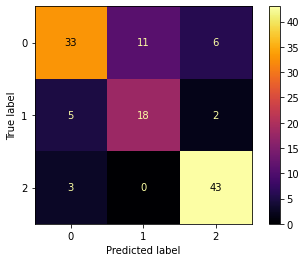

In [92]:
from sklearn.naive_bayes import MultinomialNB

x_train, x_test, y_train, y_test = train_test_split(Dataset, target, test_size=0.2, shuffle = True, random_state=1)

model = MultinomialNB().fit(x_train, y_train)

predicted = model.predict(x_test)


print(confusion_matrix(y_test, predicted))
#print(np.mean(predicted == y_test))

disp = metrics.plot_confusion_matrix(model, x_test, y_test, cmap='inferno')

aciertos=disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[2,2]
errores=disp.confusion_matrix[0,1]+disp.confusion_matrix[0,2]+disp.confusion_matrix[1,0]+disp.confusion_matrix[1,2]+disp.confusion_matrix[2,0]+disp.confusion_matrix[2,1]

print()

print('Buenas Predicciones:',aciertos)
print('Malas Predicciones:',errores)
print('Rate:',aciertos/errores)
print('Porcentaje de acierto:',aciertos/(aciertos+errores)*100,'%')

Tampoco es un buen clasificador.

#**Conclusión**

Los distintos tipo de métodos de predicción utilizados presentan presiciones similares, cercanas al 77%, en la clasificación de las imágenes. Si bien no es un mal porcentaje, no es un buen clasificador como para utilizarlo como único método de predicción para saber que tiene una persona.